## Gradient Boosting
Accuracy comparison of 5 ensemble methods:
 - Bagging
 - Random subspace
 - Random forest
 - AdaBoost
 - Gradient boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [2]:
hotel_pd = pd.read_csv('HotelRevHelpfulness.csv')
hotel_pd.head()

,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


In [3]:
hotel_pd.pop('hotelId').values
y = hotel_pd.pop('reviewHelpfulness').values
X = hotel_pd.values
X.shape

(486, 23)

In [4]:
n_est = 100
models = {}
models['Bagging'] = BaggingClassifier(n_estimators=n_est, max_samples = 1.0,
                            bootstrap = True)
models['RandomSS'] = BaggingClassifier(n_estimators = n_est,
                            max_samples=1.0, bootstrap = False,
                            max_features=0.5)
models['RandomForest'] = RandomForestClassifier(n_estimators=n_est)
models['AdaBoost'] = AdaBoostClassifier(n_estimators=n_est, algorithm = 'SAMME')
models['GradBoost'] = GradientBoostingClassifier(n_estimators=n_est, max_leaf_nodes = 4)

### Testing the 5 Ensemble Models
The evaluation entails repeated k-fold cross validation (10x10) so this evaluation takes a few minutes to run. 

In [5]:
folds = 10
n_reps = 10
res_d = {}
for model in models.keys():
    scores = cross_val_score(models[model], X, y, n_jobs = -1,
                             cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))
    print(model, scores.mean())
    res_d[model] = scores.mean()  

Bagging 0.7216113945578232
RandomSS 0.7026360544217688
RandomForest 0.7214115646258505
AdaBoost 0.7344855442176871
GradBoost 0.7383035714285714


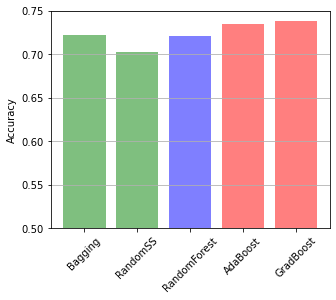

In [6]:
names = res_d.keys()
colours = ['g','g','b','r','r']
y_pos = np.arange(len(names))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos, res_d.values(), align='center', alpha=0.5, color = colours)  #width = 0.3
plt.xticks(y_pos, names,  rotation=45)
plt.ylabel('Accuracy')
plt.ylim((0.5,0.75))
plt.grid(axis = 'y')
#plt.legend(loc = 'center right')
plt.show()
f.savefig('AllEns.pdf', bbox_inches = 'tight')